In [7]:
!pip install lxml

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -------------------------- ------------- 2.6/4.0 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 13.3 MB/s eta 0:00:00


In [8]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import lxml

In [9]:
#Question 1: Use the yfinance to Extract Stock Data
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')
tables = soup.find_all('table')

for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        df = pd.read_html(str(table))[0]
        break
else:
    raise Exception('Tesla revenue spreadsheet not found')

df.columns = ['Date', 'Revenue']
df['Revenue'] = df['Revenue'].replace('[$,]', '',regex=True)
df = df[df['Revenue'] != '']
df['Revenue'] = df['Revenue'].astype(float)
tesla_revenue = df
tesla_revenue.tail()

C:\Users\javid\AppData\Local\Temp\ipykernel_4184\3201496371.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,Date,Revenue
59,2010-06-30,28.0
60,2010-03-31,21.0
61,2009-12-31,NaN
62,2009-09-30,46.0
63,2009-06-30,27.0


In [11]:
#Use yfinance to Extract Stock Data
gme = yf.Ticker('GME')
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [12]:
#Use Webscraping to Extract GME Revenue Data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in str(table):
        df = pd.read_html(str(table))[0]
        break

gme_revenue = df
gme_revenue.head()

,Date,Revenue
0,2025-03-31,19335.0
1,2024-12-31,25707.0
2,2024-09-30,25182.0
3,2024-06-30,25500.0
4,2024-03-31,21301.0


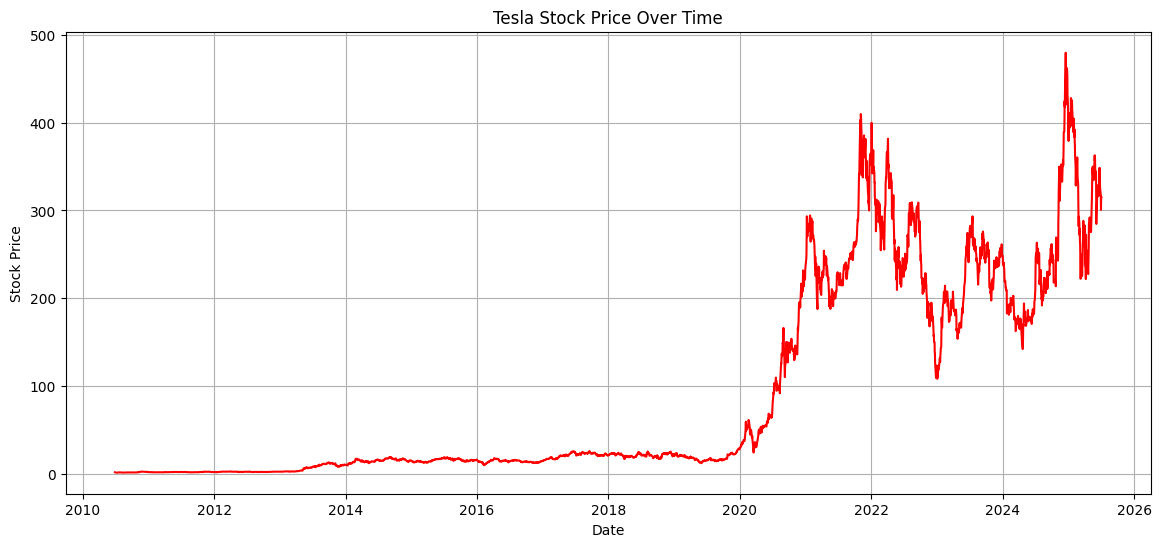

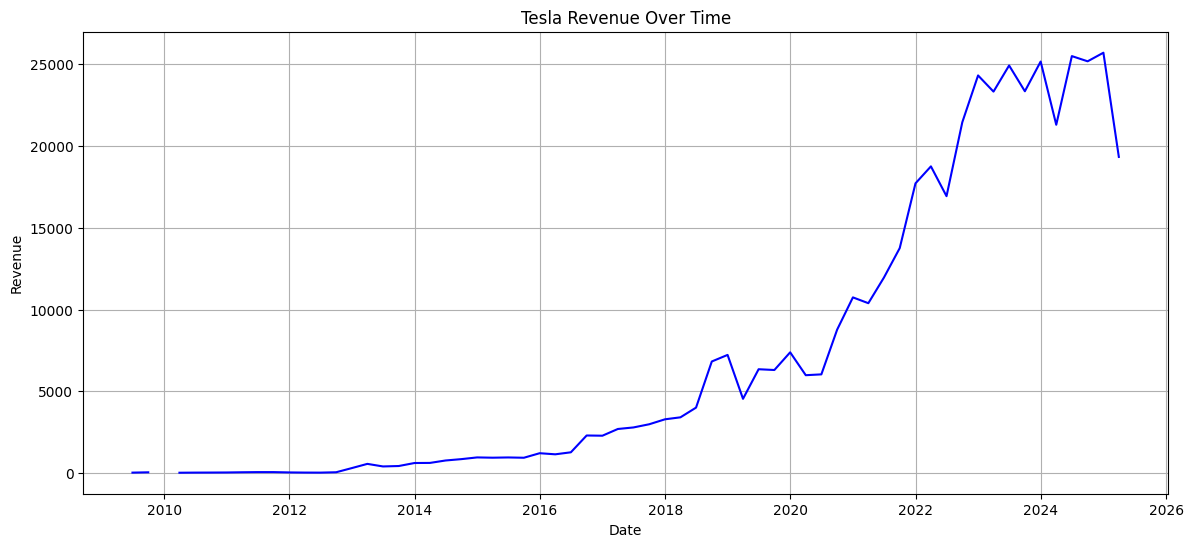

In [13]:
#Plot Tesla Stock Graph
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])


plt.figure(figsize=(14, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], color='red')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='blue')
plt.title('Tesla Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

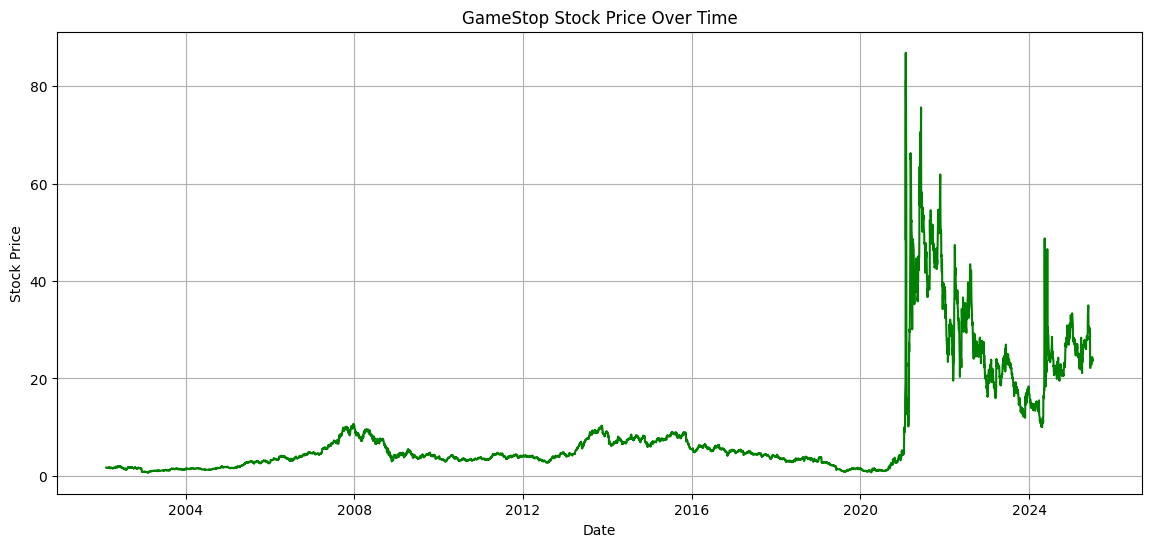

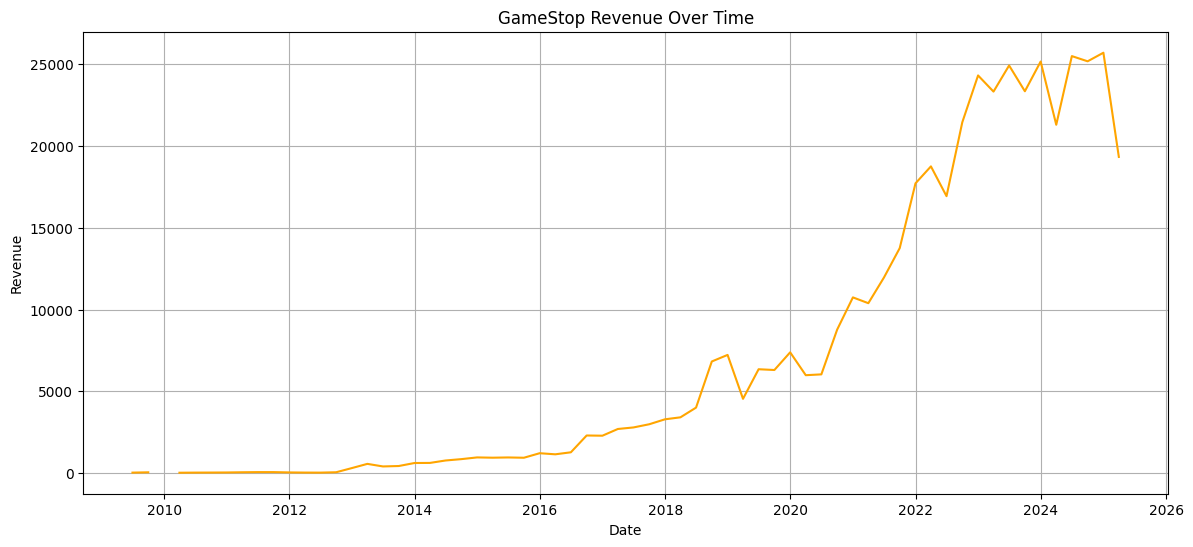

In [14]:
#Plot GameStop Stock Graph
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

plt.figure(figsize=(14, 6))
plt.plot(gme_data['Date'], gme_data['Close'], color='green')
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='orange')
plt.title('GameStop Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()